In [94]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import csv
from sklearn.preprocessing import LabelEncoder
from scipy.stats import multivariate_normal
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import cv2
import math
import pickle
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from more_itertools import powerset
import wandb
label_encoder = LabelEncoder()
imputer = SimpleImputer(strategy='mean')
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [95]:
df = pd.read_csv('./WineQT.csv')
statistics = df.describe()
print(statistics)

       fixed acidity  volatile acidity  citric acid  residual sugar   
count    1143.000000       1143.000000  1143.000000     1143.000000  \
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1143.000000          1143.000000           1143.000000  1143.000000  \
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [96]:
data_standardized = df

In [97]:
data_standardized.shape

(1143, 13)

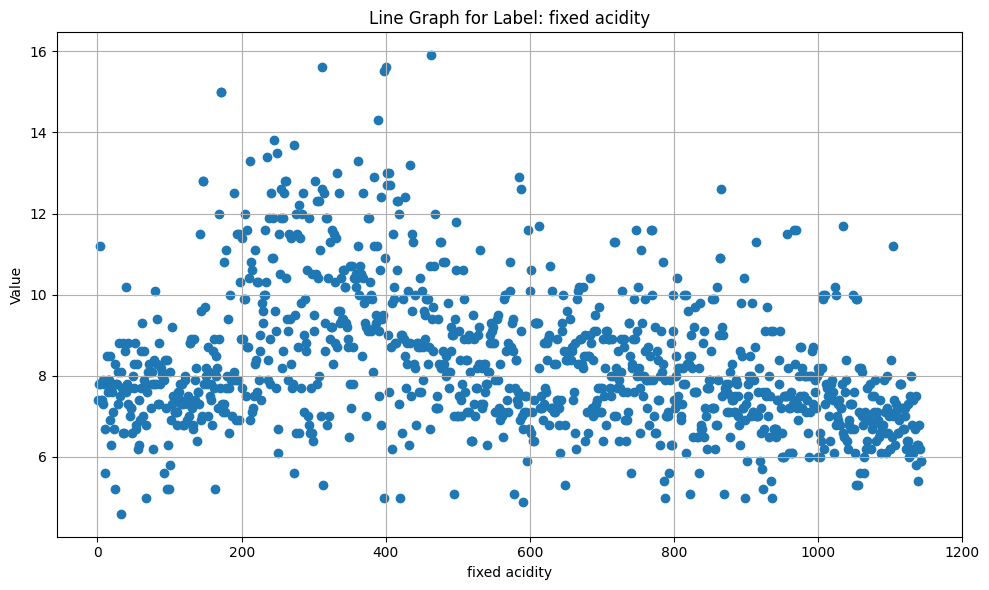

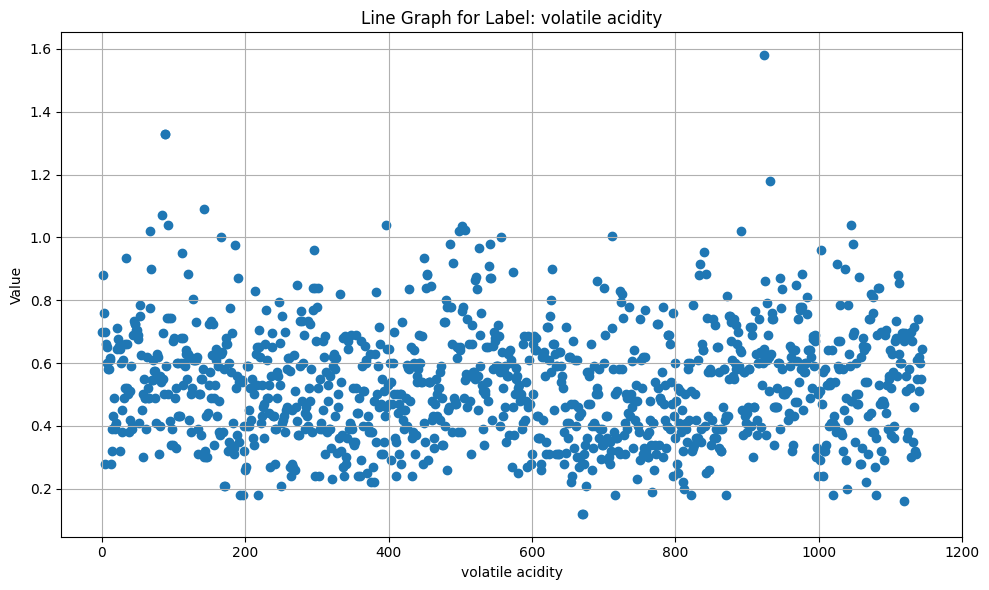

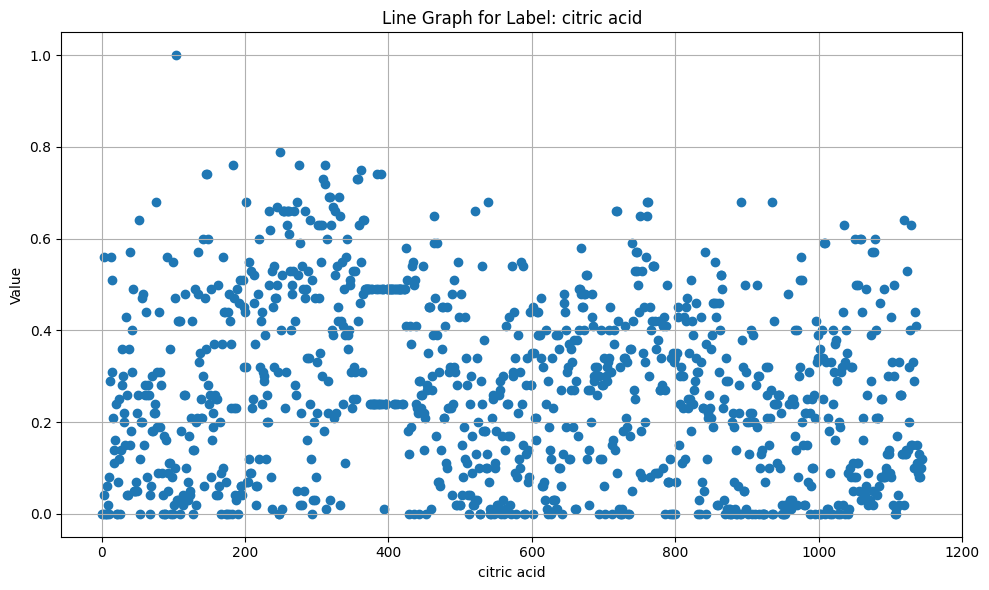

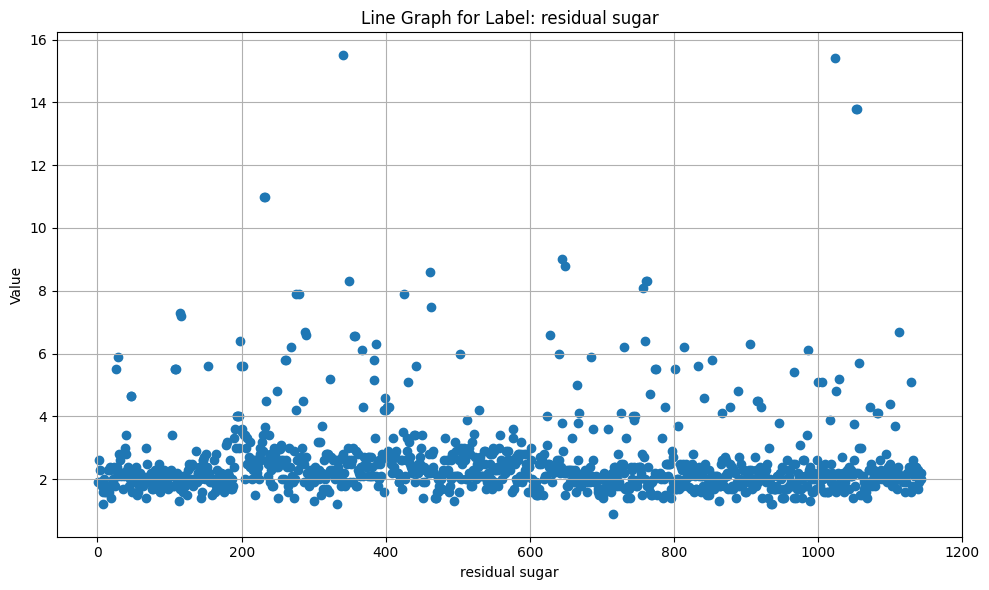

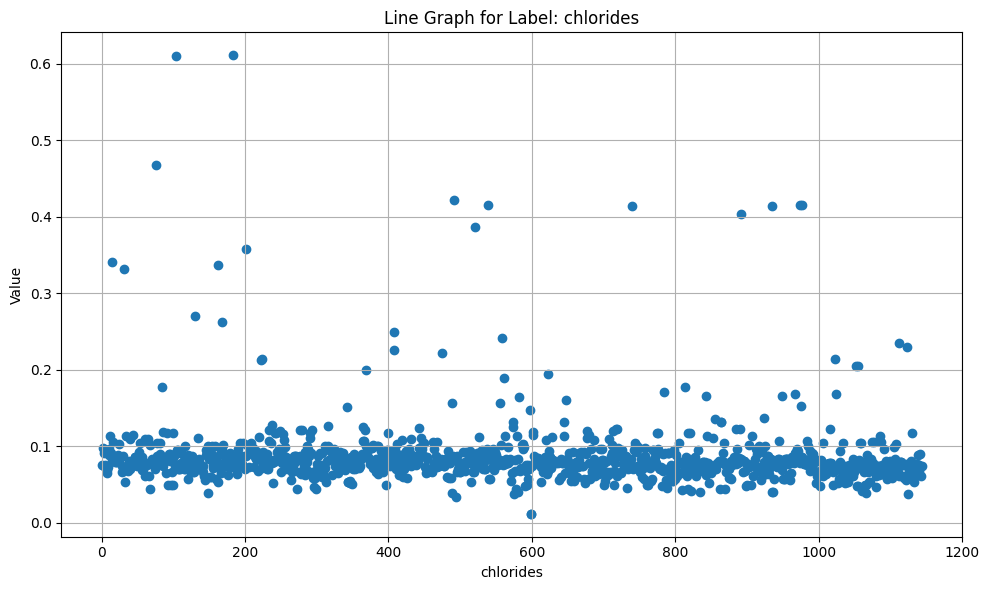

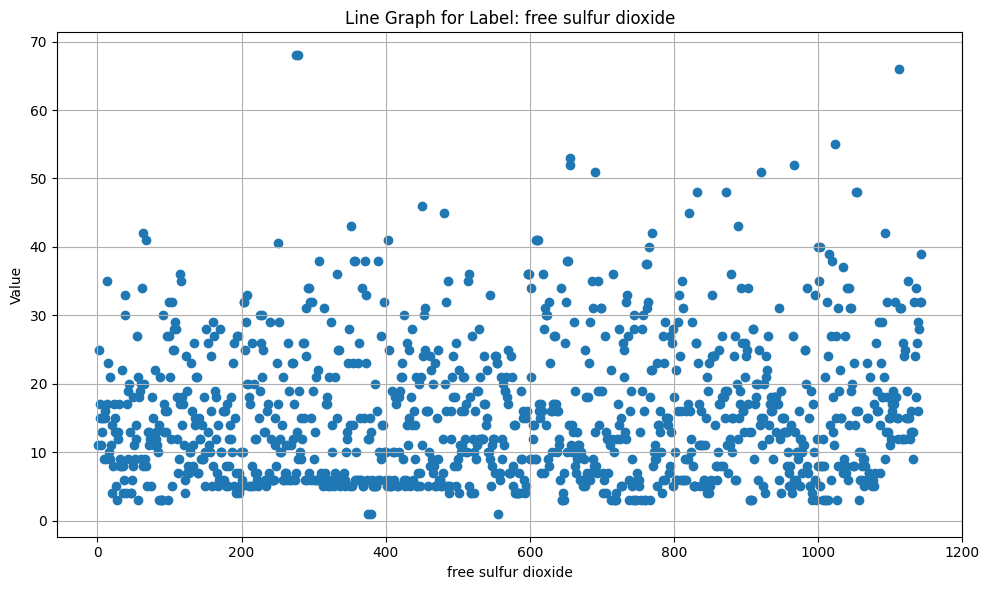

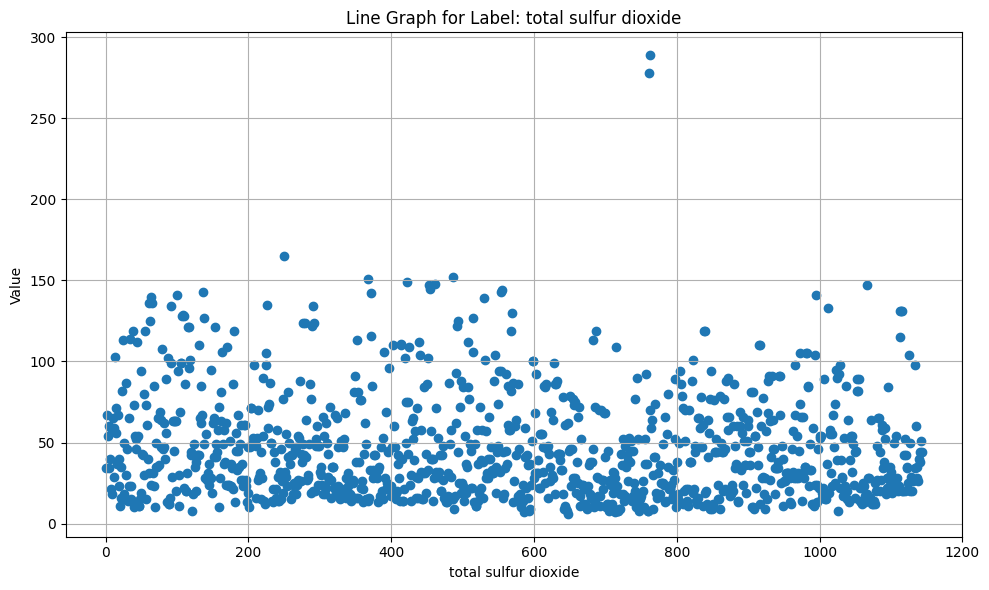

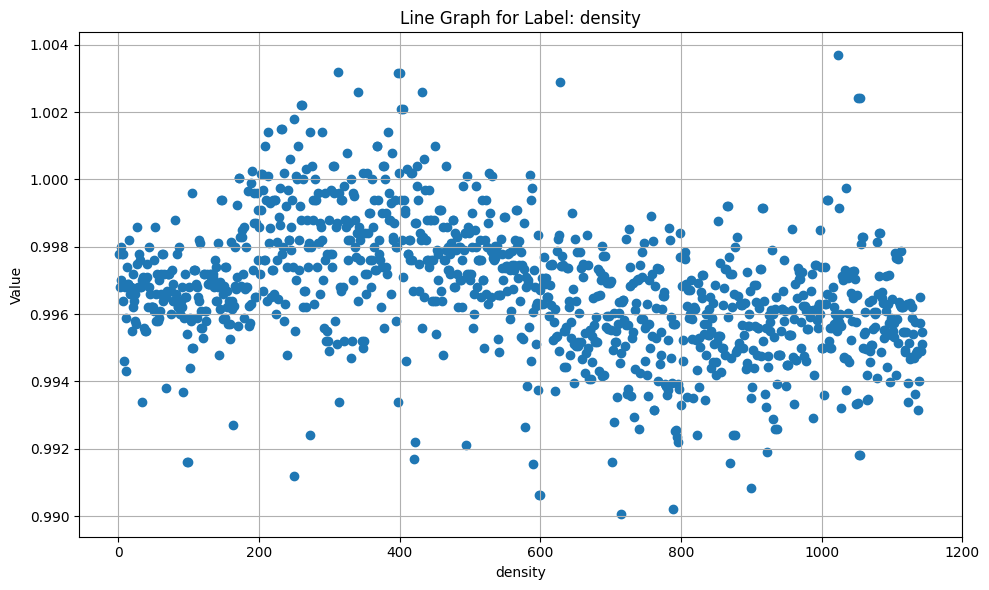

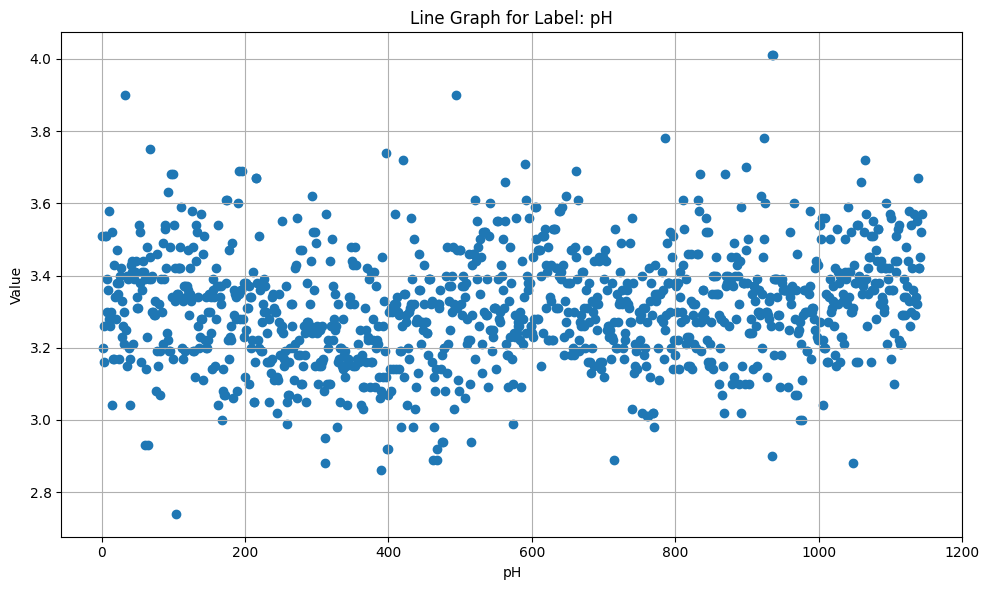

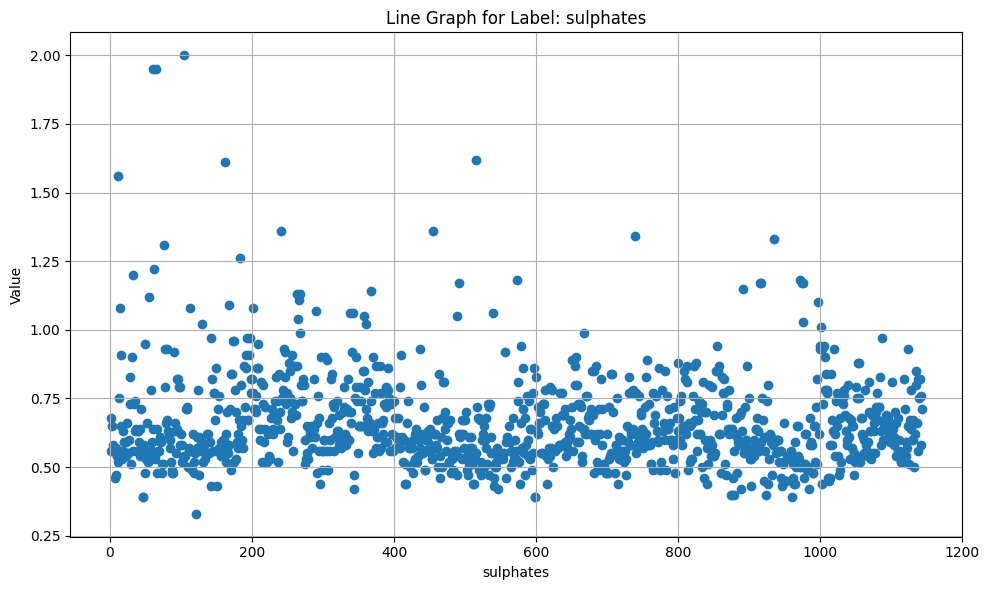

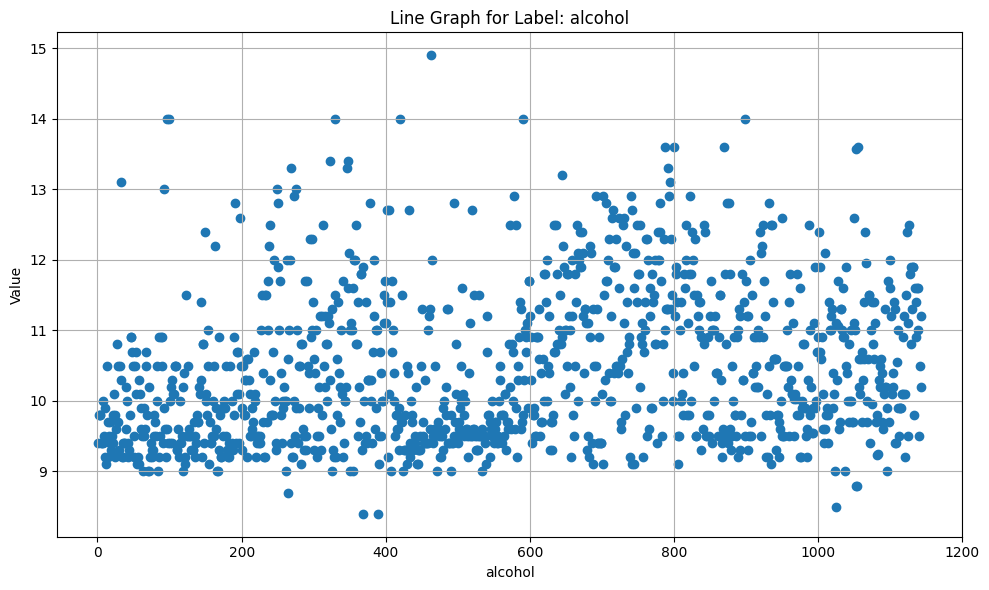

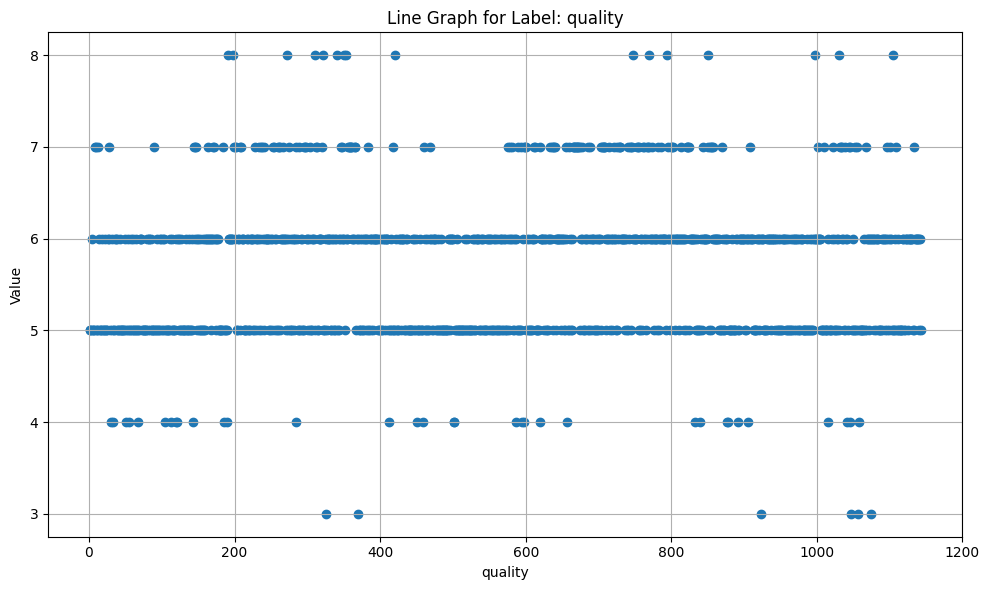

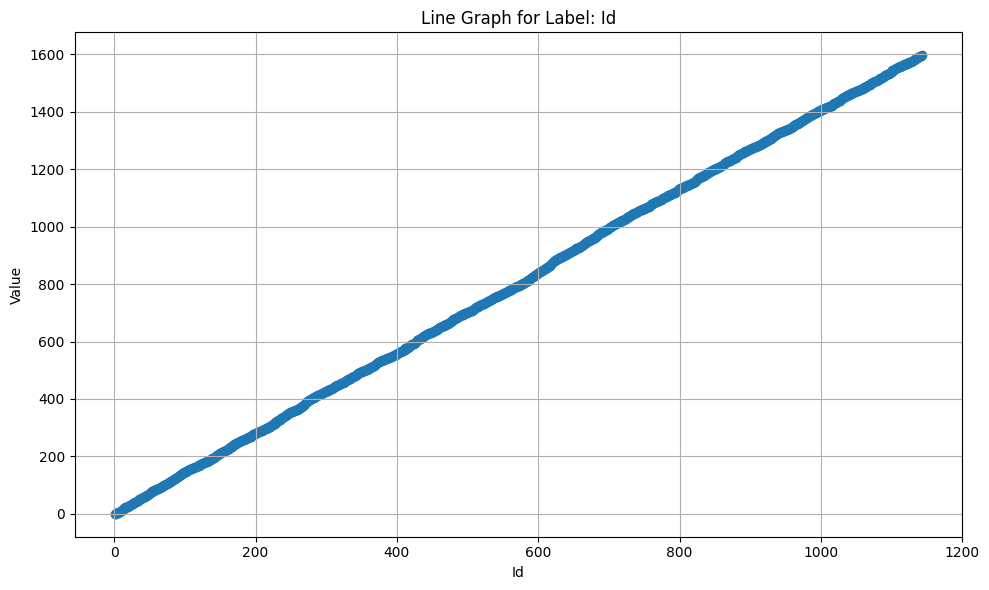

In [98]:
for label_name in df.columns:
    label_data = df[label_name]
    arr = list(range(1, len(label_data) + 1))
    plt.figure(figsize=(10, 6))
    plt.scatter(arr, label_data, marker='o', linestyle='-')
    plt.xlabel(label_name)
    plt.ylabel("Value")
    plt.title(f"Line Graph for Label: {label_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [99]:
features = data_standardized.columns.difference(["quality", "Id"])
print(features)

Index(['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
       'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates',
       'total sulfur dioxide', 'volatile acidity'],
      dtype='object')


In [100]:
x_train, x_temp, y_train, y_temp = train_test_split(data_standardized[features], df["quality"], test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [101]:
x_train.fillna(x_train.mean(), inplace=True) 
x_val.fillna(x_val.mean(), inplace=True) 
x_test.fillna (x_test.mean(), inplace=True)

std_scaler = StandardScaler() 
x_train = std_scaler.fit_transform(x_train)
x_val = std_scaler.transform(x_val)
x_test = std_scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_val = pd.DataFrame(x_val)
x_test = pd.DataFrame(x_test)

In [102]:
def softmax(scores):
    scores = np.exp(scores)
    return scores / np.sum(scores, axis=1).reshape(-1, 1)

In [103]:
def multinomial_logistic_regression(data_x, data_y, val_x, val_y, loss_function, optimization_algorithm, gamma, number_of_epochs, threshold):
    if loss_function != "cross_entropy" and optimization_algorithm != "gradient_decsent":
        return
    number_of_features = len(data_x.columns)
    number_of_data_points = len(data_x)
    classes = np.unique(data_y)
    class_to_one_hot = {element: index for index, element in enumerate(classes)}
    number_of_classes = len(np.unique(data_y))
    weights = np.random.rand(number_of_features, number_of_classes)
    prev_loss = 0
    for epoch in range(0, number_of_epochs):
        scores = np.dot(weights.T, data_x.T).T
        y_pred = softmax(scores)
        total_loss = 0
        for i in range(0, number_of_data_points):
            total_loss += -1 * np.log(y_pred[i, class_to_one_hot[data_y[i]]])
        if abs(total_loss - prev_loss) < threshold:
            print(total_loss, prev_loss)
            return weights
        prev_loss = total_loss
        loss_gradient = y_pred
        for i in range(0, number_of_data_points):
            loss_gradient[i, class_to_one_hot[data_y[i]]] -= 1
        gradient = []
        for i in range(0, number_of_classes):
            grad = 0
            for j in range(0, number_of_data_points):
                grad += loss_gradient[j, i] * data_x.values[j]
            gradient.append(grad)
        gradient = np.vstack(gradient).T
        weights -= gamma * gradient
        print(epoch, total_loss)
    scores = np.dot(weights.T, val_x.T).T
    y_pred = softmax(scores)
    report = classification_report(y_val, np.argmax(y_pred, axis=1) + 3)
    print(report)
    return weights

In [104]:
weights = multinomial_logistic_regression(x_train, y_train.values, x_val, y_val, "cross_entropy", "gradient_descent", 0.0001, 1000, 1e-3)

0 1549.465058233082
1 1528.3458518320867
2 1507.9976092641398
3 1488.401417735371
4 1469.5377436845909
5 1451.3865464657608
6 1433.9273937585888
7 1417.1395771031425
8 1401.0022254884982


9 1385.494414679661
10 1370.5952699564325
11 1356.2840601514968
12 1342.5402812762302
13 1329.3437285587852
14 1316.6745563294226
15 1304.513325812538
16 1292.841041469005
17 1281.63917703014
18 1270.8896927386659
19 1260.575045534968
20 1250.6781939841
21 1241.1825996312064
22 1232.0722262206436
23 1223.3315378568493
24 1214.9454967774227
25 1206.8995610122113
26 1199.1796818707885
27 1191.7723009735384
28 1184.6643464336105
29 1177.843227800562
30 1171.2968294657078
31 1165.0135023692233
32 1158.982054004297
33 1153.1917368556353
34 1147.632235519308
35 1142.2936528196783
36 1137.1664952673802
37 1132.241658195316
38 1127.5104108766282
39 1122.9643818785141
40 1118.595544847758
41 1114.3962048643493
42 1110.3589854441893
43 1106.4768162236642
44 1102.7429213197483
45 1099.1508083300005
46 1095.6942579168324
47 1092.367313909138
48 1089.1642738504288
49 1086.0796799244122
50 1083.1083101952966
51 1080.2451701091636
52 1077.4854842135587
53 1074.824688063625
54 1072.2584202938883
55 10

C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

In [105]:
scores = np.dot(weights.T, x_test.T).T
y_pred = softmax(scores)

In [106]:
accuracy = accuracy_score(y_test, np.argmax(y_pred, axis=1) + 3)
print(accuracy)

0.5240174672489083


In [107]:
wandb.init(project="smai_assignment_3_1", entity="harshitaggarwal4")

config = wandb.config
config.learning_rate = [0.001, 0.0001]
config.num_epochs = [200, 500, 1000]

for lr in config.learning_rate:
    for number_of_epochs in config.num_epochs:
        weights = multinomial_logistic_regression(x_train, y_train.values, x_val, y_val, "cross_entropy", "gradient_descent", lr, number_of_epochs, 1e-3)
        scores = np.dot(weights.T, x_test.T).T
        y_pred = softmax(scores)
        accuracy = accuracy_score(y_test, np.argmax(y_pred, axis=1) + 3)
        wandb.log({
            "Learning Rate": lr,
            "Epochs": number_of_epochs,
            "Accuracy": accuracy
        })
wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: harshitaggarwal4. Use `wandb login --relogin` to force relogin


0 1355.2169941688753
1 1251.130024081854
2 1179.9727471456558
3 1130.3229278258902
4 1094.854953616453
5 1068.9772664751563
6 1049.74304328362
7 1035.1913367574405
8 1023.9824853046197
9 1015.1894275936934
10 1008.1660257528663
11 1002.4584024262161
12 997.7444443763494
13 993.7927542772222
14 990.4349032159828
15 987.5466295539638
16 985.0350086483991
17 982.8296115282504
18 980.8763466578847
19 979.1331244735618
20 977.566774075208
21 976.1508294899949
22 974.8639257213847
23 973.6886259258021
24 972.6105554753792
25 971.617755771041
26 970.7001963608296
27 969.8494019119842
28 969.0581632666941
29 968.3203107564965
30 967.6305342394825
31 966.9842387239383
32 966.3774275068955
33 965.806606889412
34 965.2687080224082
35 964.761022491978
36 964.2811490121453
37 963.8269491510592
38 963.3965104365209
39 962.9881155096913
40 962.6002162490082
41 962.2314119877216
42 961.8804311102705
43 961.5461154436554
44 961.2274069662849
45 960.9233364433883
46 960.6330136684987
47 960.355619048096

C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.62      0.86      0.72        93
           6       0.66      0.20      0.30        97
           7       0.39      0.76      0.51        29
           8       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.28      0.30      0.26       229
weighted avg       0.58      0.53      0.49       229

0 1485.045654188588
1 1469.7421714202242
2 1454.9343762692936
3 1440.607915586933
4 1426.7487283870942
5 1413.3430692427387
6 1400.377523398587
7 1387.839014621477
8 1375.714806884745
9 1363.9925010070504
10 1352.6600273442043
11 1341.7056355700054
12 1331.1178824868211
13 1320.8856186871353
14 1310.9979747535372
15 1301.4443475465766
16 1292.2143869971749
17 1283.2979837006073
18 1274.6852575083376
19 1266.3665472347182
20 1258.332401538198
21 1250.573

C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

Accuracy,█▇▆▁▇█
Epochs,▁▄█▁▄█
Learning Rate,███▁▁▁
Accuracy,0.52838
Epochs,1000
Learning Rate,0.0001


In [108]:
weights = multinomial_logistic_regression(x_train, y_train.values, x_val, y_val, "cross_entropy", "gradient_descent", 0.0001, 1000, 1e-3)
scores = np.dot(weights.T, x_test.T).T
y_pred = softmax(scores)
accuracy = accuracy_score(y_test, np.argmax(y_pred, axis=1) + 3)
print(accuracy)

0 1445.9598727308742
1 1430.477029866177
2 1415.57449519518
3 1401.2301996803806
4 1387.4226831776148
5 1374.1311321717396
6 1361.3354058393302
7 1349.0160520192883
8 1337.1543146029242
9 1325.7321337464102
10 1314.7321401736524
11 1304.1376446895515
12 1293.9326238741135
13 1284.1017027863206
14 1274.6301353799815
15 1265.5037832249327
16 1256.7090930366692
17 1248.2330734441346
18 1240.0632713655407
19 1232.187748312699
20 1224.5950569013912
21 1217.274217806342
22 1210.2146973622903
23 1203.4063859762036
24 1196.8395774796838
25 1190.504949515239
26 1184.393545016037
27 1178.4967548069365
28 1172.806301325991
29 1167.3142234411057
30 1162.0128623168066
31 1156.8948482714818
32 1151.9530885561765
33 1147.180755981707
34 1142.5712783207487
35 1138.1183284152855
36 1133.8158149256835
37 1129.6578736649221
38 1125.6388594692246
39 1121.7533385629752
40 1117.9960813811467
41 1114.3620558159455
42 1110.8464208556168
43 1107.4445205830348
44 1104.1518784999
45 1100.9641921397933
46 1097.87

C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469